In [5]:
import random
import matplotlib.pyplot as plt
from PIL import Image
from module.data_setup import CustomDataset
from torch.utils.data import DataLoader

train_path = 'dataset/augment_data'
train_file = 'dataset/train.txt'
val_file = 'dataset/val.txt'
vocab_file = 'dataset/augment_labels.txt'
batch_size = 256
seq_length = 224
image_size = (224, 224)
train_dataset = CustomDataset(train_path, train_file, vocab_file, seq_length, image_size)
val_dataset = CustomDataset(train_path, val_file, vocab_file, seq_length, image_size)

In [6]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
for batch_idx, (input_encoder, input_decoder) in enumerate(train_loader):
    input_encoder, input_decoder = input_encoder.to(device), input_decoder.to(device)

In [9]:
l = [i for i in range(len(train_dataset))]

In [10]:
random_l = random.sample(l, 9)

In [11]:
random_l

[9172, 14181, 16020, 13399, 15224, 11465, 17594, 14625, 5372]

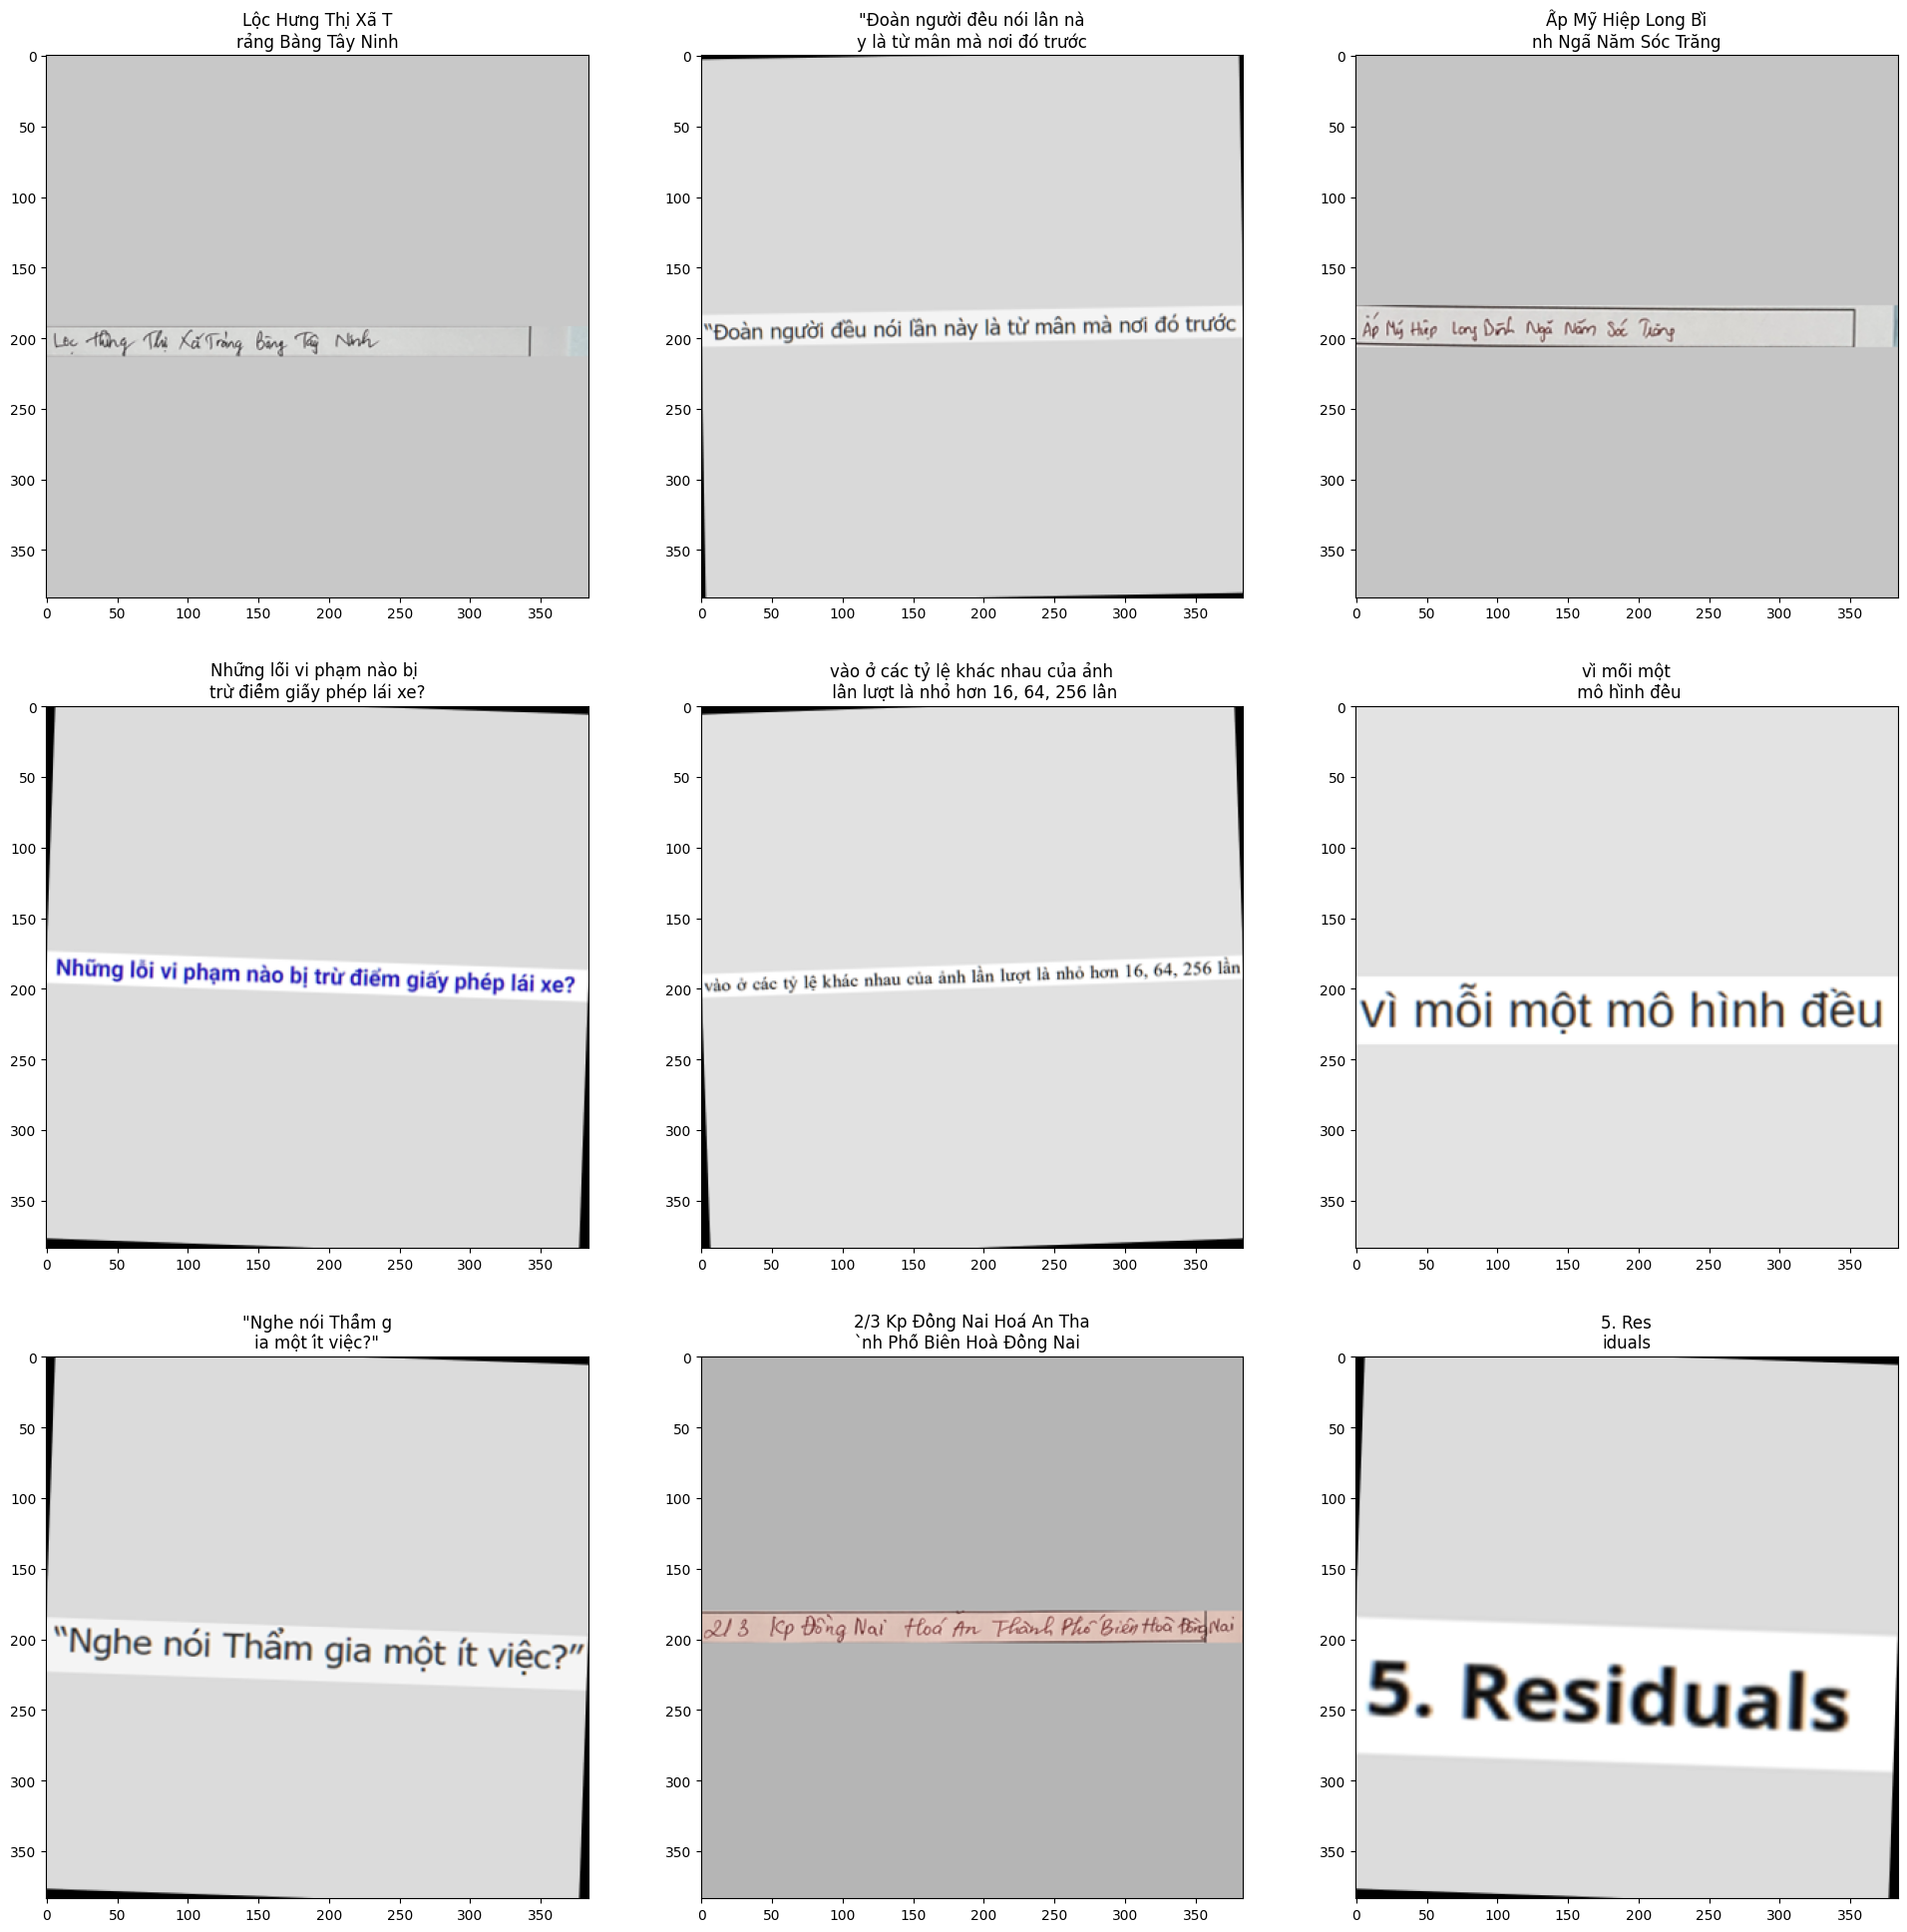

In [12]:
m = 3
n = 3
idx = 0
_, axs = plt.subplots(m, n, figsize=(24, 24))
for i in range(m):
    for j in range(n):
        image = Image.open(f'dataset/augment_data/{train_dataset.input[random_l[idx]]}')
        label = train_dataset.output[random_l[idx]]
        t = len(label)
        text = label[:t//2] + '\n' + label[t//2:]
        axs[i][j].imshow(image, cmap='gray')
        axs[i][j].set_title(text)
        idx += 1

In [5]:
import regex
vocab = r'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗÔỖốỐộỘơƠơỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ '

tokens = [i for i in vocab]
vocabs = set()
with open('D:/DATN_Handle/augment_labels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        image_name, label = line.strip().split('--------')
        # chars = regex.findall(r'\X', label)
        for char in label:
            vocabs.add(char)
        # vocabs.add(line.rstrip())
    f.close()
for char in tokens:
    if char not in vocabs:
        print(char)

@
`
~


In [6]:
vocabs

{' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '°',
 '²',
 'À',
 'Á',
 'Â',
 'Ã',
 'È',
 'É',
 'Ê',
 'Ì',
 'Í',
 'Ð',
 'Ò',
 'Ó',
 'Ô',
 'Õ',
 'Ö',
 'Ù',
 'Ú',
 'Ü',
 'Ý',
 'à',
 'á',
 'â',
 'ã',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ð',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ù',
 'ú',
 'ü',
 'ý',
 'Ā',
 'ā',
 'Ă',
 'ă',
 'Đ',
 'đ',
 'Ĩ',
 'ĩ',
 'Ō',
 'ō',
 'Ũ',
 'ũ',
 'Ū',
 'ū',
 'Ơ',
 'ơ',
 'Ư',
 'ư',
 '̀',
 '́',
 '̃',
 '̉',
 '̣',
 'Ạ',
 'ạ',
 'Ả',
 'ả',
 'Ấ',
 'ấ',
 'Ầ',
 'ầ',
 'Ẩ',
 'ẩ',
 'Ẫ',
 'ẫ